In [1]:
import sympy
sympy.init_printing() 

In [2]:
from sympy import Function, Derivative, Eq, symbols
from sympkf import SymbolicPKF, t, PDESystem, Expectation

In [3]:
from sympy import cos, sin, tan

In [4]:
r, phi, l = symbols('r phi lambda')
cp = symbols('c_p')
g = symbols('g')
R = symbols('R')
omega = symbols('omega')

u, v, w = Function('u')(t, r, phi, l), Function('v')(t, r, phi, l), Function('w')(t, r, phi, l)
P, T, rho = Function('P')(t, r, phi, l), Function('T')(t, r, phi, l), Function('rho')(t, r, phi, l)


In [87]:
def adv(x):
    return u/(r*cos(phi))*Derivative(x, l) + v/r * Derivative(x, phi) + w*Derivative(x, r)

def div(u, v, w):
    return 1/r**2 * Derivative(r**2*w, r) + 1/(r*sin(phi)) * Derivative(sin(phi)*v, phi) + 1/(r*sin(phi)) * Derivative(u, l)

In [101]:
Eq1 = Eq(P, rho*R*T)
Eq2 = Eq(Derivative(T, t), 0)
Eq3 = Eq(Derivative(rho, t), 0)
Eq4 = Eq(Derivative(u, t), 0)
Eq5 = Eq(Derivative(v, t), 0)
Eq6 = Eq(Derivative(w, t), 0)
#Eq3 = Eq(D(rho), -rho*(div(u,v,w)))
#Eq3 = Eq(D(u) - u*v*tan(phi)/r + u*w/r, -1/(rho*r*cos(phi))*Derivative(P, l) - 2*omega*cos(phi)*w + 2*omega*sin(phi)*v)
#Eq4 = Eq(D(v) + u**2 * tan(phi)/r + v*w/r, -1/(rho*r) * Derivative(P, phi) - 2*omega*sin(phi)*u)
#Eq5 = Eq(D(w) - (u**2 + v**2)/r, -g - 1/(rho)*Derivative(P, r) + 2*omega*cos(phi)*u)
#Eq2 = Eq(D(T), 1/(rho*cp) * D(P))


In [102]:
NavierStokes = [Eq1, Eq2, Eq3, Eq4,Eq5,Eq6]

In [103]:
#NavierStokes

In [104]:
for Equation in NavierStokes:
    display(Equation)
    print('________________________________________________')
    

________________________________________________


________________________________________________


________________________________________________


________________________________________________


________________________________________________


________________________________________________


In [105]:
Navier = PDESystem(NavierStokes)

In [106]:
Navier

PDE System :
        prognostic functions : T(t, r, phi, lambda), rho(t, r, phi, lambda), u(t, r, phi, lambda), v(t, r, phi, lambda), w(t, r, phi, lambda)
        constant functions   : 
        exogeneous functions : P(t, r, phi, lambda)
        constants            : R
        

In [107]:
Pkf_NavierStokes = SymbolicPKF(NavierStokes)

------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------


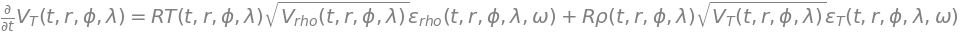

------------------------------------------------------------------------------------------------------


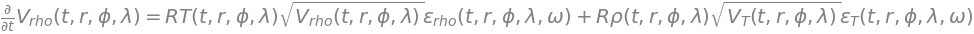

------------------------------------------------------------------------------------------------------


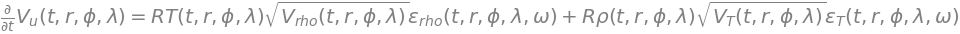

------------------------------------------------------------------------------------------------------


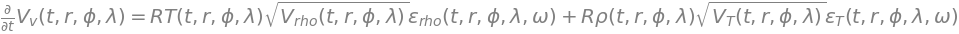

------------------------------------------------------------------------------------------------------


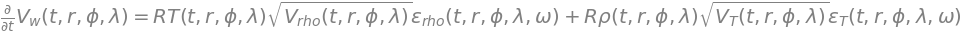

------------------------------------------------------------------------------------------------------


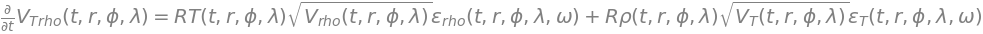

------------------------------------------------------------------------------------------------------


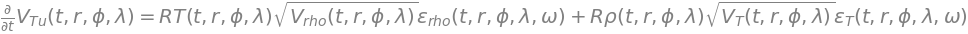

------------------------------------------------------------------------------------------------------


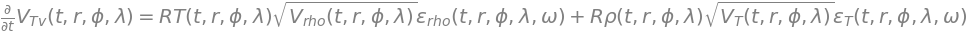

------------------------------------------------------------------------------------------------------


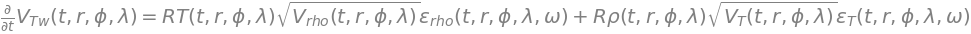

------------------------------------------------------------------------------------------------------


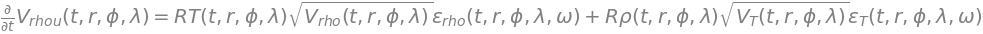

------------------------------------------------------------------------------------------------------


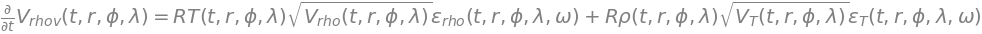

------------------------------------------------------------------------------------------------------


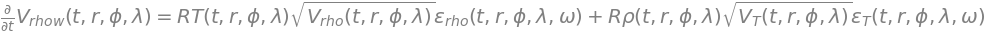

------------------------------------------------------------------------------------------------------


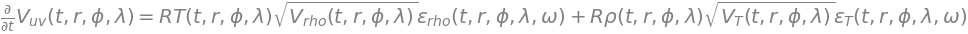

------------------------------------------------------------------------------------------------------


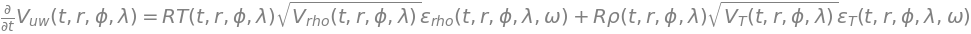

------------------------------------------------------------------------------------------------------


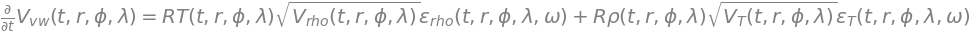

------------------------------------------------------------------------------------------------------


                                                                              
                                                 _______________________      
                               R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅Expec
∂                                                                             
──({g_{T,rr}}(t, r, φ, λ)) = - ───────────────────────────────────────────────
∂t                                                                            
                                                                              

      ⎛                                                                       
      ⎜                                   ⎛∂                                  
tation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{T}}(t, r, φ, λ, ω)
      ⎝                                   ⎝∂r                                 
──────────────────────────────────────────────────────────────────────────────
        {V_{T}}(t, r, φ, λ)                        

------------------------------------------------------------------------------------------------------


                                                   _______________________    
                                 R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅Exp
∂                                                                             
──({g_{T,rphi}}(t, r, φ, λ)) = - ─────────────────────────────────────────────
∂t                                                                            
                                                                              

        ⎛                                 ∂                                   
ectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, ω))
        ⎝                                 ∂φ                                  
──────────────────────────────────────────────────────────────────────────────
                          2⋅{V_{T}}(t, r, φ, λ)                               
                                                                              

 ∂                                     ⎞          

------------------------------------------------------------------------------------------------------


                                                      _______________________ 
                                    R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅
∂                                                                             
──({g_{T,rlambda}}(t, r, φ, λ)) = - ──────────────────────────────────────────
∂t                                                                            
                                                                              

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               
──────────────────────────────────────────────────────────────────────────────
                             2⋅{V_{T}}(t, r, φ, λ)                            
                                                                              

    ∂                                     ⎞       

------------------------------------------------------------------------------------------------------


                                                                              
                                                     _______________________  
                                   R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅E
∂                                                                             
──({g_{T,phiphi}}(t, r, φ, λ)) = - ───────────────────────────────────────────
∂t                                                                            
                                                                              

          ⎛                                                                   
          ⎜                                   ⎛∂                              
xpectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{T}}(t, r, φ, λ
          ⎝                                   ⎝∂φ                             
──────────────────────────────────────────────────────────────────────────────
            {V_{T}}(t, r, φ, λ)                    

------------------------------------------------------------------------------------------------------


                                                        ______________________
                                      R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ)
∂                                                                             
──({g_{T,philambda}}(t, r, φ, λ)) = - ────────────────────────────────────────
∂t                                                                            
                                                                              

_            ⎛                                 ∂                              
 ⋅Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
             ⎝                                 ∂λ                             
──────────────────────────────────────────────────────────────────────────────
                               2⋅{V_{T}}(t, r, φ, λ)                          
                                                                              

      ∂                                     ⎞     

------------------------------------------------------------------------------------------------------


                                                                              
                                                           ___________________
                                         R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ,
∂                                                                             
──({g_{T,lambdalambda}}(t, r, φ, λ)) = - ─────────────────────────────────────
∂t                                                                            
                                                                              

                ⎛                                                             
____            ⎜                                   ⎛∂                        
 λ) ⋅Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{T}}(t, r
                ⎝                                   ⎝∂λ                       
──────────────────────────────────────────────────────────────────────────────
                  {V_{T}}(t, r, φ, λ)              

------------------------------------------------------------------------------------------------------


                                                              ⎛               
                                                              ⎜               
                                 2⋅R⋅T(t, r, φ, λ)⋅Expectation⎜{\varepsilon_{r
∂                                                             ⎝               
──({g_{rho,rr}}(t, r, φ, λ)) = - ─────────────────────────────────────────────
∂t                                                                          __
                                                                          ╲╱ {

                                                            2⎞                
                    ⎛∂                                     ⎞ ⎟                
ho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟ ⎟   R⋅T(t, r, φ, 
                    ⎝∂r                                    ⎠ ⎠                
────────────────────────────────────────────────────────────── + ─────────────
_____________________                              

------------------------------------------------------------------------------------------------------


                                                                ⎛             
                                   2⋅R⋅T(t, r, φ, λ)⋅Expectation⎜{\varepsilon_
∂                                                               ⎝             
──({g_{rho,rphi}}(t, r, φ, λ)) = - ───────────────────────────────────────────
∂t                                                                            
                                                                              

                      ∂                                      ∂                
{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⋅──({\varepsilon_{
                      ∂φ                                     ∂r               
──────────────────────────────────────────────────────────────────────────────
                  _______________________                                     
                ╲╱ {V_{rho}}(t, r, φ, λ)                                      

                     ⎞                            

------------------------------------------------------------------------------------------------------


                                                                   ⎛          
                                      2⋅R⋅T(t, r, φ, λ)⋅Expectation⎜{\varepsil
∂                                                                  ⎝          
──({g_{rho,rlambda}}(t, r, φ, λ)) = - ────────────────────────────────────────
∂t                                                                            
                                                                              

                         ∂                                      ∂             
on_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⋅──({\varepsilo
                         ∂λ                                     ∂r            
──────────────────────────────────────────────────────────────────────────────
                     _______________________                                  
                   ╲╱ {V_{rho}}(t, r, φ, λ)                                   

                        ⎞                         

------------------------------------------------------------------------------------------------------


                                                                  ⎛           
                                                                  ⎜           
                                     2⋅R⋅T(t, r, φ, λ)⋅Expectation⎜{\varepsilo
∂                                                                 ⎝           
──({g_{rho,phiphi}}(t, r, φ, λ)) = - ─────────────────────────────────────────
∂t                                                                            
                                                                              

                                                                2⎞            
                        ⎛∂                                     ⎞ ⎟            
n_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟ ⎟   R⋅T(t, r,
                        ⎝∂φ                                    ⎠ ⎠            
────────────────────────────────────────────────────────────────── + ─────────
  _______________________                          

------------------------------------------------------------------------------------------------------


                                                                     ⎛        
                                        2⋅R⋅T(t, r, φ, λ)⋅Expectation⎜{\vareps
∂                                                                    ⎝        
──({g_{rho,philambda}}(t, r, φ, λ)) = - ──────────────────────────────────────
∂t                                                                            
                                                                              

                           ∂                                      ∂           
ilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⋅──({\varepsi
                           ∂λ                                     ∂φ          
──────────────────────────────────────────────────────────────────────────────
                       _______________________                                
                     ╲╱ {V_{rho}}(t, r, φ, λ)                                 

                          ⎞                       

------------------------------------------------------------------------------------------------------


                                                                        ⎛     
                                                                        ⎜     
                                           2⋅R⋅T(t, r, φ, λ)⋅Expectation⎜{\var
∂                                                                       ⎝     
──({g_{rho,lambdalambda}}(t, r, φ, λ)) = - ───────────────────────────────────
∂t                                                                            
                                                                              

                                                                      2⎞      
                              ⎛∂                                     ⎞ ⎟      
epsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟ ⎟   R⋅T
                              ⎝∂λ                                    ⎠ ⎠      
──────────────────────────────────────────────────────────────────────── + ───
        _______________________                    

------------------------------------------------------------------------------------------------------


                                                                              
                                                 _______________________      
                               R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅Expec
∂                                                                             
──({g_{u,rr}}(t, r, φ, λ)) = - ───────────────────────────────────────────────
∂t                                                                            
                                                                              

      ⎛                                                                       
      ⎜                                   ⎛∂                                  
tation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{u}}(t, r, φ, λ, ω)
      ⎝                                   ⎝∂r                                 
──────────────────────────────────────────────────────────────────────────────
        {V_{u}}(t, r, φ, λ)                        

------------------------------------------------------------------------------------------------------


                                                   _______________________    
                                 R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅Exp
∂                                                                             
──({g_{u,rphi}}(t, r, φ, λ)) = - ─────────────────────────────────────────────
∂t                                                                            
                                                                              

        ⎛                                   ∂                                 
ectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{u}}(t, r, φ, λ, ω
        ⎝                                   ∂φ                                
──────────────────────────────────────────────────────────────────────────────
                           {V_{u}}(t, r, φ, λ)                                
                                                                              

   ∂                                   ⎞          

------------------------------------------------------------------------------------------------------


                                                      _______________________ 
                                    R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅
∂                                                                             
──({g_{u,rlambda}}(t, r, φ, λ)) = - ──────────────────────────────────────────
∂t                                                                            
                                                                              

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{u}}(t, r, φ, λ
           ⎝                                   ∂λ                             
──────────────────────────────────────────────────────────────────────────────
                              {V_{u}}(t, r, φ, λ)                             
                                                                              

      ∂                                   ⎞       

------------------------------------------------------------------------------------------------------


                                                                              
                                                     _______________________  
                                   R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅E
∂                                                                             
──({g_{u,phiphi}}(t, r, φ, λ)) = - ───────────────────────────────────────────
∂t                                                                            
                                                                              

          ⎛                                                                   
          ⎜                                   ⎛∂                              
xpectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{u}}(t, r, φ, λ
          ⎝                                   ⎝∂φ                             
──────────────────────────────────────────────────────────────────────────────
            {V_{u}}(t, r, φ, λ)                    

------------------------------------------------------------------------------------------------------


                                                        ______________________
                                      R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ)
∂                                                                             
──({g_{u,philambda}}(t, r, φ, λ)) = - ────────────────────────────────────────
∂t                                                                            
                                                                              

_            ⎛                                   ∂                            
 ⋅Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{u}}(t, r, φ,
             ⎝                                   ∂λ                           
──────────────────────────────────────────────────────────────────────────────
                                {V_{u}}(t, r, φ, λ)                           
                                                                              

        ∂                                   ⎞     

------------------------------------------------------------------------------------------------------


                                                                              
                                                           ___________________
                                         R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ,
∂                                                                             
──({g_{u,lambdalambda}}(t, r, φ, λ)) = - ─────────────────────────────────────
∂t                                                                            
                                                                              

                ⎛                                                             
____            ⎜                                   ⎛∂                        
 λ) ⋅Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{u}}(t, r
                ⎝                                   ⎝∂λ                       
──────────────────────────────────────────────────────────────────────────────
                  {V_{u}}(t, r, φ, λ)              

------------------------------------------------------------------------------------------------------


                                                                              
                                                 _______________________      
                               R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅Expec
∂                                                                             
──({g_{v,rr}}(t, r, φ, λ)) = - ───────────────────────────────────────────────
∂t                                                                            
                                                                              

      ⎛                                                                       
      ⎜                                   ⎛∂                                  
tation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{v}}(t, r, φ, λ, ω)
      ⎝                                   ⎝∂r                                 
──────────────────────────────────────────────────────────────────────────────
        {V_{v}}(t, r, φ, λ)                        

------------------------------------------------------------------------------------------------------


                                                   _______________________    
                                 R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅Exp
∂                                                                             
──({g_{v,rphi}}(t, r, φ, λ)) = - ─────────────────────────────────────────────
∂t                                                                            
                                                                              

        ⎛                                   ∂                                 
ectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{v}}(t, r, φ, λ, ω
        ⎝                                   ∂φ                                
──────────────────────────────────────────────────────────────────────────────
                           {V_{v}}(t, r, φ, λ)                                
                                                                              

   ∂                                   ⎞          

------------------------------------------------------------------------------------------------------


                                                      _______________________ 
                                    R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅
∂                                                                             
──({g_{v,rlambda}}(t, r, φ, λ)) = - ──────────────────────────────────────────
∂t                                                                            
                                                                              

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{v}}(t, r, φ, λ
           ⎝                                   ∂λ                             
──────────────────────────────────────────────────────────────────────────────
                              {V_{v}}(t, r, φ, λ)                             
                                                                              

      ∂                                   ⎞       

------------------------------------------------------------------------------------------------------


                                                                              
                                                     _______________________  
                                   R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅E
∂                                                                             
──({g_{v,phiphi}}(t, r, φ, λ)) = - ───────────────────────────────────────────
∂t                                                                            
                                                                              

          ⎛                                                                   
          ⎜                                   ⎛∂                              
xpectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{v}}(t, r, φ, λ
          ⎝                                   ⎝∂φ                             
──────────────────────────────────────────────────────────────────────────────
            {V_{v}}(t, r, φ, λ)                    

------------------------------------------------------------------------------------------------------


                                                        ______________________
                                      R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ)
∂                                                                             
──({g_{v,philambda}}(t, r, φ, λ)) = - ────────────────────────────────────────
∂t                                                                            
                                                                              

_            ⎛                                   ∂                            
 ⋅Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{v}}(t, r, φ,
             ⎝                                   ∂λ                           
──────────────────────────────────────────────────────────────────────────────
                                {V_{v}}(t, r, φ, λ)                           
                                                                              

        ∂                                   ⎞     

------------------------------------------------------------------------------------------------------


                                                                              
                                                           ___________________
                                         R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ,
∂                                                                             
──({g_{v,lambdalambda}}(t, r, φ, λ)) = - ─────────────────────────────────────
∂t                                                                            
                                                                              

                ⎛                                                             
____            ⎜                                   ⎛∂                        
 λ) ⋅Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{v}}(t, r
                ⎝                                   ⎝∂λ                       
──────────────────────────────────────────────────────────────────────────────
                  {V_{v}}(t, r, φ, λ)              

------------------------------------------------------------------------------------------------------


                                                                              
                                                 _______________________      
                               R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅Expec
∂                                                                             
──({g_{w,rr}}(t, r, φ, λ)) = - ───────────────────────────────────────────────
∂t                                                                            
                                                                              

      ⎛                                                                       
      ⎜                                   ⎛∂                                  
tation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{w}}(t, r, φ, λ, ω)
      ⎝                                   ⎝∂r                                 
──────────────────────────────────────────────────────────────────────────────
        {V_{w}}(t, r, φ, λ)                        

------------------------------------------------------------------------------------------------------


                                                   _______________________    
                                 R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅Exp
∂                                                                             
──({g_{w,rphi}}(t, r, φ, λ)) = - ─────────────────────────────────────────────
∂t                                                                            
                                                                              

        ⎛                                   ∂                                 
ectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{w}}(t, r, φ, λ, ω
        ⎝                                   ∂φ                                
──────────────────────────────────────────────────────────────────────────────
                           {V_{w}}(t, r, φ, λ)                                
                                                                              

   ∂                                   ⎞          

------------------------------------------------------------------------------------------------------


                                                      _______________________ 
                                    R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅
∂                                                                             
──({g_{w,rlambda}}(t, r, φ, λ)) = - ──────────────────────────────────────────
∂t                                                                            
                                                                              

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{w}}(t, r, φ, λ
           ⎝                                   ∂λ                             
──────────────────────────────────────────────────────────────────────────────
                              {V_{w}}(t, r, φ, λ)                             
                                                                              

      ∂                                   ⎞       

------------------------------------------------------------------------------------------------------


                                                                              
                                                     _______________________  
                                   R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ) ⋅E
∂                                                                             
──({g_{w,phiphi}}(t, r, φ, λ)) = - ───────────────────────────────────────────
∂t                                                                            
                                                                              

          ⎛                                                                   
          ⎜                                   ⎛∂                              
xpectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{w}}(t, r, φ, λ
          ⎝                                   ⎝∂φ                             
──────────────────────────────────────────────────────────────────────────────
            {V_{w}}(t, r, φ, λ)                    

------------------------------------------------------------------------------------------------------


                                                        ______________________
                                      R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ, λ)
∂                                                                             
──({g_{w,philambda}}(t, r, φ, λ)) = - ────────────────────────────────────────
∂t                                                                            
                                                                              

_            ⎛                                   ∂                            
 ⋅Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{w}}(t, r, φ,
             ⎝                                   ∂λ                           
──────────────────────────────────────────────────────────────────────────────
                                {V_{w}}(t, r, φ, λ)                           
                                                                              

        ∂                                   ⎞     

------------------------------------------------------------------------------------------------------


                                                                              
                                                           ___________________
                                         R⋅T(t, r, φ, λ)⋅╲╱ {V_{rho}}(t, r, φ,
∂                                                                             
──({g_{w,lambdalambda}}(t, r, φ, λ)) = - ─────────────────────────────────────
∂t                                                                            
                                                                              

                ⎛                                                             
____            ⎜                                   ⎛∂                        
 λ) ⋅Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{w}}(t, r
                ⎝                                   ⎝∂λ                       
──────────────────────────────────────────────────────────────────────────────
                  {V_{w}}(t, r, φ, λ)              

------------------------------------------------------------------------------------------------------


In [108]:
for equation in Pkf_NavierStokes.in_metric:
    display(equation)
    print('------------------------------------------------------------------------------------------------------')

In [109]:
for term in Pkf_NavierStokes.unclosed_terms:
    display(term)

           ⎛                                                                  
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅{\varepsilon_{w}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
  ∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{v}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{rho}}(t, r, φ, 
           ⎝                                 ⎝∂λ                              

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂φ                               

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂r                                    ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{T}}(t, r, φ, 
           ⎝                                   ⎝∂φ                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{w}}(t, r, φ, λ
           ⎝                                   ∂λ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅{\varepsilon_{w}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
  ∂r                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{u}}(t, r, φ, λ
           ⎝                                   ∂φ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂r                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{v}}(t, r, φ, λ
           ⎝                                   ∂λ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{rho}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                     ⎞
)⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
  ∂r                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                     ⎞
ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
    ∂λ                                    ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{w}}(t, r, φ, λ,
           ⎝                                 ⎝∂r                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{w}}(t, r, φ, λ,
           ⎝                                 ⎝∂φ                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂φ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂φ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                     ⎞
ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
    ∂λ                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂λ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂φ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                     ⎞
ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
    ∂r                                    ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂λ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{T}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{w}}(t, r, φ, λ
           ⎝                                   ∂λ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂r                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂λ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{rho}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{T}}(t, r, φ, λ, ω))⎟
  ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂λ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂φ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂λ                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂λ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{T}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{T}}(t, r, φ, 
           ⎝                                   ⎝∂λ                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{v}}(t, r, φ, λ, ω)⋅
           ⎝                                                                  

∂                                   ⎞
──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
∂φ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{rho}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{T}}(t, r, φ, λ, ω))⎟
  ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂r                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂λ                                  ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{rho}}(t, r, φ
           ⎝                                   ⎝∂r                            

         2⎞
        ⎞ ⎟
, λ, ω))⎟ ⎟
        ⎠ ⎠

           ⎛                   2                ∂                             
Expectation⎜{\varepsilon_{rho}} (t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ
           ⎝                                    ∂φ                            

        ⎞
, λ, ω))⎟
        ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂λ                                  ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{u}}(t, r, φ, 
           ⎝                                   ⎝∂r                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅{\varepsilon_{v}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
  ∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂φ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{w}}(t, r, φ, 
           ⎝                                   ⎝∂r                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{w}}(t, r, φ, λ, ω)⋅
           ⎝                                                                  

∂                                   ⎞
──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂λ                                  ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{u}}(t, r, φ, 
           ⎝                                   ⎝∂λ                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{v}}(t, r, φ, λ,
           ⎝                                 ⎝∂φ                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                 2                ∂                               
Expectation⎜{\varepsilon_{T}} (t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ,
           ⎝                                  ∂r                              

    ⎞
 ω))⎟
    ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{w}}(t, r, φ, λ,
           ⎝                                 ⎝∂λ                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂r                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{rho}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                     ⎞
)⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
  ∂λ                                    ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ,
           ⎝                                   ∂λ                             

        ∂                                     ⎞
 λ, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
        ∂r                                    ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅{\varepsilon_{u}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
  ∂λ                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{v}}(t, r, φ, λ
           ⎝                                   ∂λ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ,
           ⎝                                   ∂λ                             

        ∂                                     ⎞
 λ, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
        ∂φ                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂λ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂r                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂λ                                  ⎠

           ⎛                   2                ∂                             
Expectation⎜{\varepsilon_{rho}} (t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ
           ⎝                                    ∂λ                            

        ⎞
, λ, ω))⎟
        ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂λ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{v}}(t, r, φ, 
           ⎝                                   ⎝∂λ                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{T}}(t, r, φ, λ,
           ⎝                                 ⎝∂φ                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂λ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂λ                                  ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{u}}(t, r, φ, 
           ⎝                                   ⎝∂φ                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{w}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                     ⎞
ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
    ∂φ                                    ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂λ                             

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂φ                                    ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅{\varepsilon_{v}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
  ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{u}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂λ                             

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂λ                                    ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂r                             

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂r                                    ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂r                             

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂φ                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂λ                               

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂r                                    ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂φ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{T}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{T}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{v}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂λ                               

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂φ                                    ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂φ                             

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂r                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂λ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                 2                ∂                               
Expectation⎜{\varepsilon_{T}} (t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ,
           ⎝                                  ∂φ                              

    ⎞
 ω))⎟
    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{u}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅{\varepsilon_{w}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
  ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{T}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{w}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂φ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{T}}(t, r, φ, λ,
           ⎝                                 ⎝∂λ                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{w}}(t, r, φ, λ, ω)⋅
           ⎝                                                                  

∂                                   ⎞
──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
∂φ                                  ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{rho}}(t, r, φ, 
           ⎝                                 ⎝∂φ                              

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{u}}(t, r, φ, λ,
           ⎝                                 ⎝∂λ                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{u}}(t, r, φ, λ
           ⎝                                   ∂λ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂φ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{u}}(t, r, φ, λ, ω)⋅
           ⎝                                                                  

∂                                   ⎞
──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
∂φ                                  ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{u}}(t, r, φ, λ,
           ⎝                                 ⎝∂r                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅{\varepsilon_{u}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
  ∂φ                                  ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{T}}(t, r, φ, λ,
           ⎝                                 ⎝∂r                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅{\varepsilon_{u}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
  ∂r                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ,
           ⎝                                   ∂φ                             

        ∂                                     ⎞
 λ, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
        ∂r                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{v}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                 2                ∂                               
Expectation⎜{\varepsilon_{T}} (t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ,
           ⎝                                  ∂λ                              

    ⎞
 ω))⎟
    ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{rho}}(t, r, φ
           ⎝                                   ⎝∂φ                            

         2⎞
        ⎞ ⎟
, λ, ω))⎟ ⎟
        ⎠ ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{v}}(t, r, φ, λ, ω)⋅
           ⎝                                                                  

∂                                   ⎞
──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
∂r                                  ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{v}}(t, r, φ, λ,
           ⎝                                 ⎝∂λ                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{v}}(t, r, φ, 
           ⎝                                   ⎝∂φ                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{u}}(t, r, φ, λ
           ⎝                                   ∂λ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{u}}(t, r, φ, λ,
           ⎝                                 ⎝∂φ                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂λ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{w}}(t, r, φ, λ
           ⎝                                   ∂φ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂φ                             

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂φ                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                     ⎞
ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
    ∂φ                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂r                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{T}}(t, r, φ, 
           ⎝                                   ⎝∂r                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂φ                             

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂λ                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                     ⎞
ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
    ∂λ                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{w}}(t, r, φ, λ, ω)⋅
           ⎝                                                                  

∂                                   ⎞
──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
∂r                                  ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{w}}(t, r, φ, 
           ⎝                                   ⎝∂φ                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{rho}}(t, r, φ, 
           ⎝                                 ⎝∂r                              

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂r                             

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂λ                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                     ⎞
ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
    ∂r                                    ⎠

           ⎛                                                                  
           ⎜                                 ⎛∂                               
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{v}}(t, r, φ, λ,
           ⎝                                 ⎝∂r                              

     2⎞
    ⎞ ⎟
 ω))⎟ ⎟
    ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂λ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{rho}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{T}}(t, r, φ, λ, ω))⎟
  ∂λ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{rho}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                     ⎞
)⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
  ∂φ                                    ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{rho}}(t, r, φ
           ⎝                                   ⎝∂λ                            

         2⎞
        ⎞ ⎟
, λ, ω))⎟ ⎟
        ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂r                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{v}}(t, r, φ, λ
           ⎝                                   ∂φ                             

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{T}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂λ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂r                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂r                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{u}}(t, r, φ, λ, ω)⋅
           ⎝                                                                  

∂                                   ⎞
──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
∂λ                                  ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{v}}(t, r, φ, 
           ⎝                                   ⎝∂r                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{u}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                     ⎞
ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
    ∂r                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂φ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
      ∂φ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅{\varepsilon_{v}}(t, r, φ, λ, ω
           ⎝                                                                  

  ∂                                   ⎞
)⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
  ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{w}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                     ⎞
ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
    ∂φ                                    ⎠

           ⎛                                                                  
           ⎜                                   ⎛∂                             
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅⎜──({\varepsilon_{w}}(t, r, φ, 
           ⎝                                   ⎝∂λ                            

       2⎞
      ⎞ ⎟
λ, ω))⎟ ⎟
      ⎠ ⎠

           ⎛                   2                ∂                             
Expectation⎜{\varepsilon_{rho}} (t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ
           ⎝                                    ∂r                            

        ⎞
, λ, ω))⎟
        ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂λ                                  ⎠

           ⎛                                   ∂                              
Expectation⎜{\varepsilon_{rho}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ
           ⎝                                   ∂λ                             

      ∂                                     ⎞
, ω))⋅──({\varepsilon_{rho}}(t, r, φ, λ, ω))⎟
      ∂r                                    ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{rho}}(t, r, φ, λ
           ⎝                                 ∂φ                               

      ∂                                   ⎞
, ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
      ∂λ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{v}}(t, r, φ, λ, ω)⋅
           ⎝                                                                  

∂                                   ⎞
──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{u}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂φ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂λ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂r                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂λ                                  ⎠

           ⎛                                                                  
Expectation⎜{\varepsilon_{T}}(t, r, φ, λ, ω)⋅{\varepsilon_{u}}(t, r, φ, λ, ω)⋅
           ⎝                                                                  

∂                                   ⎞
──({\varepsilon_{u}}(t, r, φ, λ, ω))⎟
∂r                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{w}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{w}}(t, r, φ, λ, ω))⎟
    ∂λ                                  ⎠

           ⎛                                 ∂                                
Expectation⎜{\varepsilon_{v}}(t, r, φ, λ, ω)⋅──({\varepsilon_{T}}(t, r, φ, λ, 
           ⎝                                 ∂φ                               

    ∂                                   ⎞
ω))⋅──({\varepsilon_{v}}(t, r, φ, λ, ω))⎟
    ∂r                                  ⎠